In [5]:
%config IPCompleter.greedy=True

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]


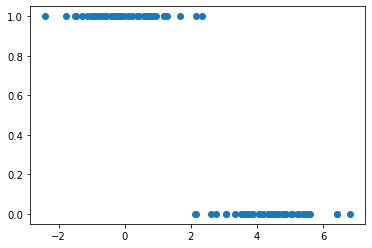

In [283]:
import numpy as np
from numpy.random import randn, uniform
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + 2.718 ** -x)

m = 100
X = np.array((np.ones(m), np.append(randn(m // 2) + uniform(4, 6), randn(m // 2)))).T
y = np.append(np.zeros(m // 2), np.ones(m // 2))

print(y)

for x in X[1:]: x = (x - min(x)) / (max(x) - min(x))  # normalize X
# y = (y - min(y)) / (max(y) - min(y))  # normalize y

plt.scatter(X[:, 1], y)
plt.show()